In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("../data/dataset/train/train.csv")
audio_df = pd.read_csv("../data/dataset/train/train_audio.csv")
visual_df = pd.read_csv("../data/dataset/train/train_visual.csv")

In [3]:
def convert_duration_to_seconds(duration):
    pattern = r'PT(\d+H)?(\d+M)?(\d+S)?'
    hours, minutes, seconds = re.match(pattern, duration).groups()
    
    total_seconds = 0
    if hours:
        total_seconds += int(hours[:-1]) * 3600
    if minutes:
        total_seconds += int(minutes[:-1]) * 60
    if seconds:
        total_seconds += int(seconds[:-1])
    
    return total_seconds

duration = df['duration'].apply(convert_duration_to_seconds)
print(duration)

0      1476
1       630
2      1822
3      2994
4       585
       ... 
341    2222
342    2308
343     464
344     698
345     904
Name: duration, Length: 346, dtype: int64


## Duration Blues
### How much does Duration affect our outputs?
First we'll look at the spread of duration, in seconds.

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16092\3441517061.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=duration, y=duration.index, palette=cmap)


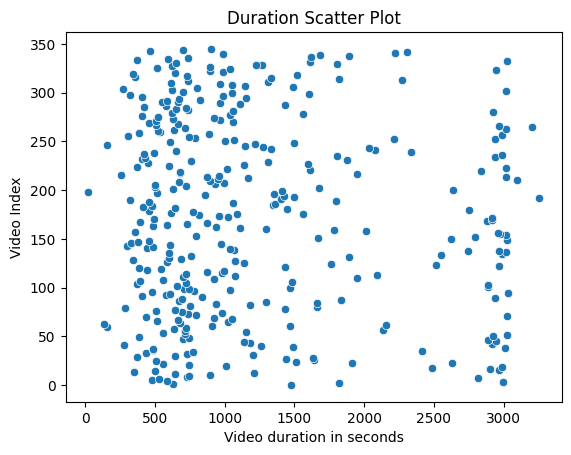

In [26]:
cmap_name = 'viridis'
cmap = plt.get_cmap(cmap_name)

sns.scatterplot(x=duration, y=duration.index, palette=cmap)

plt.title("Duration Scatter Plot")
plt.xlabel("Video duration in seconds")
plt.ylabel("Video Index")

plt.show()

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16092\2977669173.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=duration, bins=bin_edges, kde=True, palette="muted")


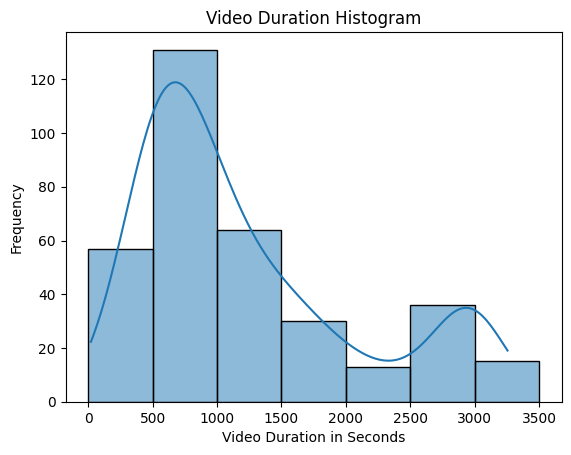

In [27]:
bin_edges = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]

sns.histplot(data=duration, bins=bin_edges, kde=True, palette="muted")

plt.title("Video Duration Histogram")
plt.xlabel("Video Duration in Seconds")
plt.ylabel("Frequency")

plt.show()

Now we can look at the relationship between duration and likes per view

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16092\4142776085.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(x=duration, y=df['likes_per_view'], palette="viridis", kind='scatter')
c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


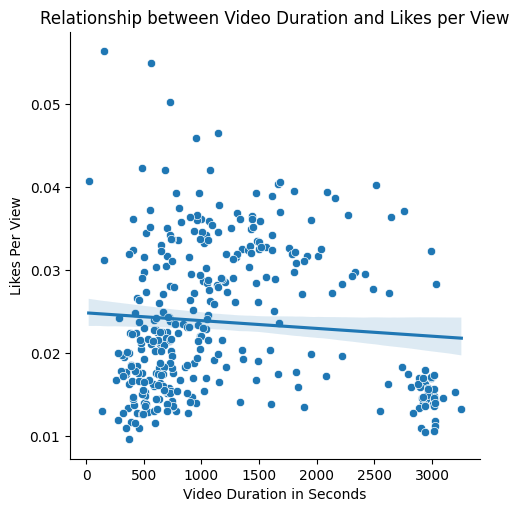

In [28]:
g = sns.relplot(x=duration, y=df['likes_per_view'], palette="viridis", kind='scatter')
sns.regplot(x=duration, y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Video Duration and Likes per View")
plt.xlabel("Video Duration in Seconds")
plt.ylabel("Likes Per View")

plt.show()

And then finally, looking at duration vs views per week

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16092\3640655733.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(x=duration, y=df['views_per_week'], palette="viridis", kind='scatter')
c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


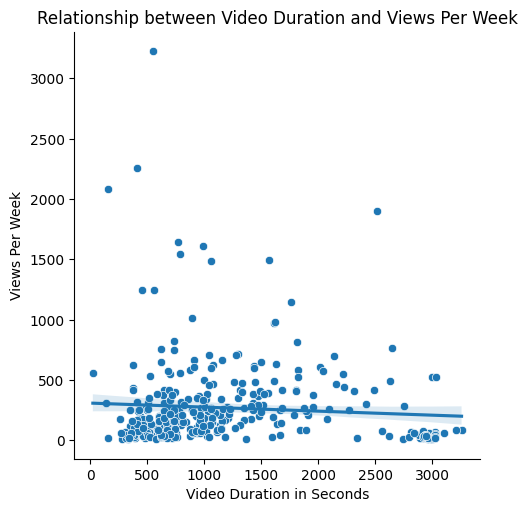

In [29]:
g = sns.relplot(x=duration, y=df['views_per_week'], palette="viridis", kind='scatter')
sns.regplot(x=duration, y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Video Duration and Views Per Week")
plt.xlabel("Video Duration in Seconds")
plt.ylabel("Views Per Week")

plt.show()

## Duration hypothesis, tested with null model
### Hypothesis: Likes per view is lower when the video is less than 10 minutes or longer than 40 minutes, and higher otherwise
To test this prediction I will be doing a null model hypothesis for the likes per view of videos in these three ranges, and then comparing them

In [30]:
df['duration_in_seconds'] = duration
null_under_10 = df.loc[df['duration_in_seconds'] < 600, 'likes_per_view'].mean()*100
null_over_40 = df.loc[df['duration_in_seconds'] > 2400, 'likes_per_view'].mean()*100
null_between = df.loc[(df['duration_in_seconds'] > 600) & (df['duration_in_seconds'] < 2400), 'likes_per_view'].mean()*100

print(f'The average likes per view for videos less than 10 minutes long is {null_under_10}%')
print(f'The average likes per view for videos longer than 40 minutes long is {null_over_40}%')
print(f'The average likes per view for videos between 10 and 40 minutes long is {null_between}%')

The average likes per view for videos less than 10 minutes long is 2.095611365119467%
The average likes per view for videos longer than 40 minutes long is 1.7516747384990181%
The average likes per view for videos between 10 and 40 minutes long is 2.634107794215827%


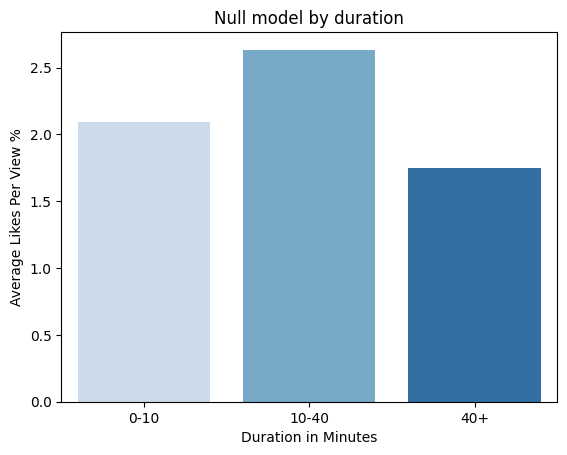

In [31]:
values = [null_under_10, null_between, null_over_40]
duration_range = ['0-10', '10-40', '40+']
data = { 'Average Likes Per View' : values,
        'Duration in Minutes' : duration_range }
temp_df = pd.DataFrame(data)

sns.barplot(x='Duration in Minutes', y='Average Likes Per View', data=temp_df, palette="Blues")

plt.title("Null model by duration")
plt.xlabel("Duration in Minutes")
plt.ylabel("Average Likes Per View %")

plt.show()

## Comments, behind the curtain
### How much does Comments contribute to our Outputs?
In this portion, I'll be analysing the spread of comments and seeing how much it correlates to likes per view and views per week. Comments were one of the features that formed part of the most successful models up until this point, so seeing how much it contributed helps me understand the model much better. In all fairness, it's predictable that an increase in comments will lead to an increase in like per view, but this isn't necessarily data that we'd have for a given video. Or it's at least not the sort of data we want to predict on.

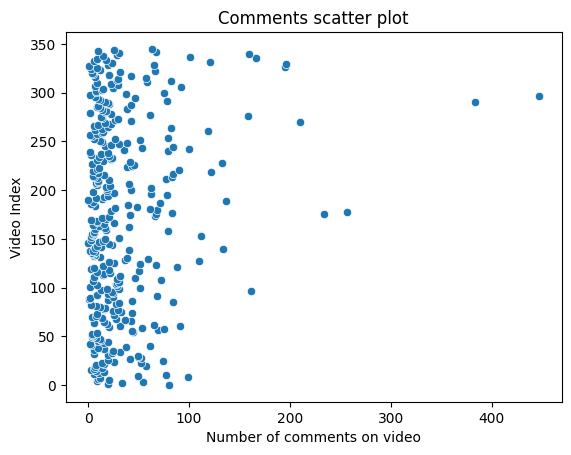

In [32]:
sns.scatterplot(x=df['comments'], y=df.index)

plt.title("Comments scatter plot")
plt.xlabel("Number of comments on video")
plt.ylabel("Video Index")

plt.show()

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16092\627837013.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df['comments'], bins=bin_edges, kde=True, palette="muted")


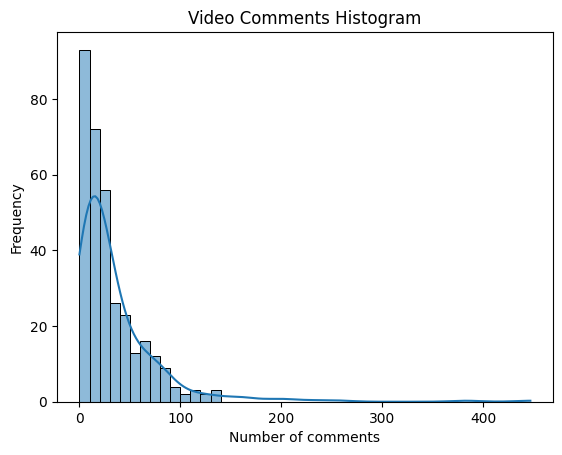

In [33]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

sns.histplot(data=df['comments'], bins=bin_edges, kde=True, palette="muted")

plt.title("Video Comments Histogram")
plt.xlabel("Number of comments")
plt.ylabel("Frequency")

plt.show()

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16092\1053091397.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(x=df['comments'], y=df['likes_per_view'], palette="viridis", kind='scatter')
c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


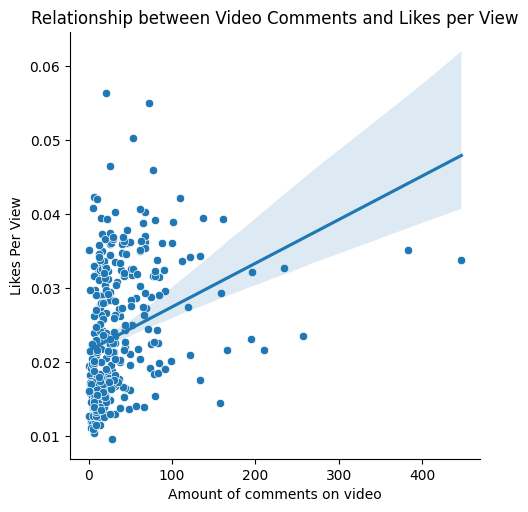

In [34]:
g = sns.relplot(x=df['comments'], y=df['likes_per_view'], palette="viridis", kind='scatter')
sns.regplot(x=df['comments'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Video Comments and Likes per View")
plt.xlabel("Amount of comments on video")
plt.ylabel("Likes Per View")

plt.show()

C:\Users\LeeJa\AppData\Local\Temp\ipykernel_16092\721567581.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(x=df['comments'], y=df['views_per_week'], palette="viridis", kind='scatter')
c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


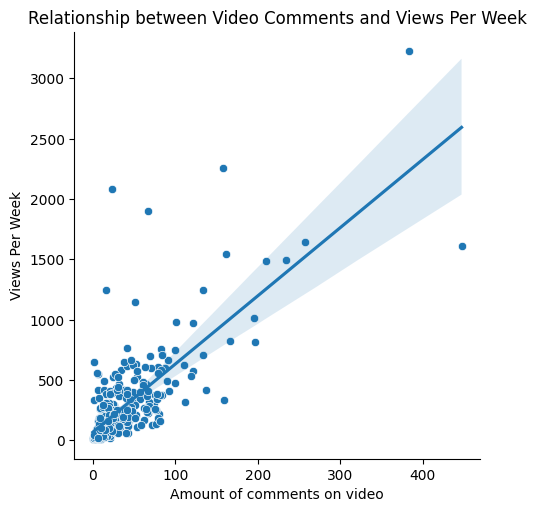

In [35]:
g = sns.relplot(x=df['comments'], y=df['views_per_week'], palette="viridis", kind='scatter')
sns.regplot(x=df['comments'], y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Video Comments and Views Per Week")
plt.xlabel("Amount of comments on video")
plt.ylabel("Views Per Week")

plt.show()

## Elapsed Weeks
### Elapsed Weeks should have a simple linear effect on the output

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


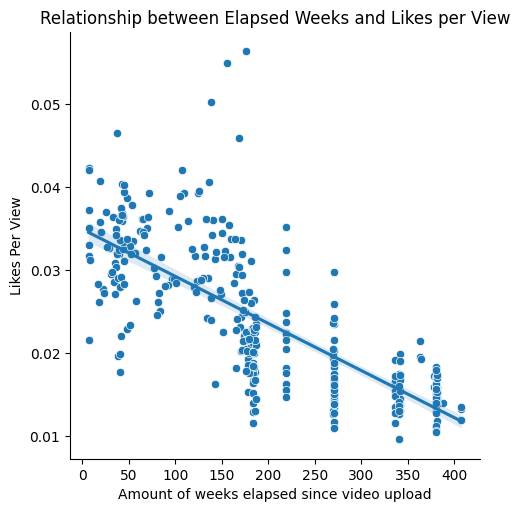

In [36]:
g = sns.relplot(x=df['elapsed_weeks'], y=df['likes_per_view'], kind='scatter')
sns.regplot(x=df['elapsed_weeks'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Elapsed Weeks and Likes per View")
plt.xlabel("Amount of weeks elapsed since video upload")
plt.ylabel("Likes Per View")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


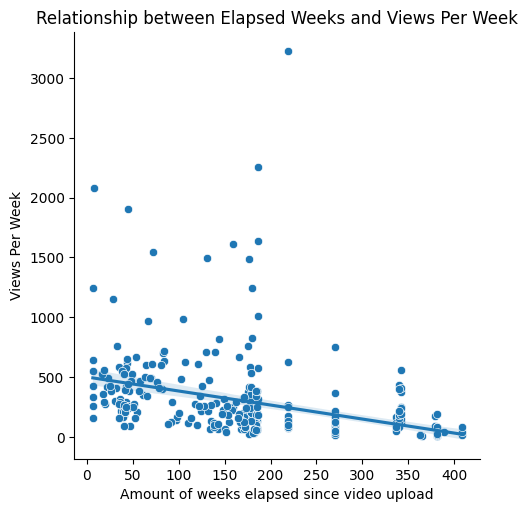

In [37]:
g = sns.relplot(x=df['elapsed_weeks'], y=df['views_per_week'], kind='scatter')
sns.regplot(x=df['elapsed_weeks'], y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Elapsed Weeks and Views Per Week")
plt.xlabel("Amount of weeks elapsed since video upload")
plt.ylabel("Views Per Week")

plt.show()

## Speech Processing Analaysis
### Looking at the effects of pitch range and speech rate

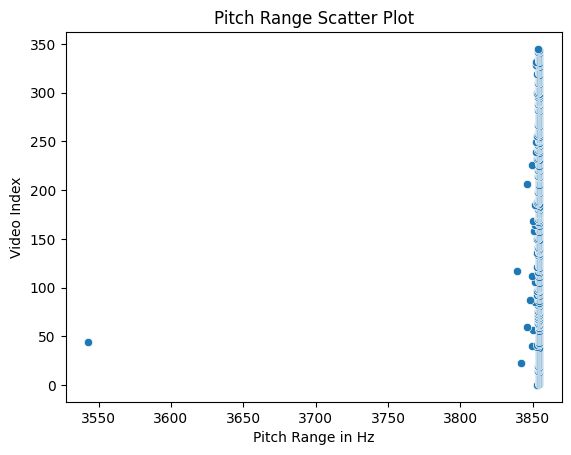

In [38]:
sns.scatterplot(x=audio_df['pitch_range'], y=audio_df.index)

plt.title("Pitch Range Scatter Plot")
plt.xlabel("Pitch Range in Hz")
plt.ylabel("Video Index")

plt.show()

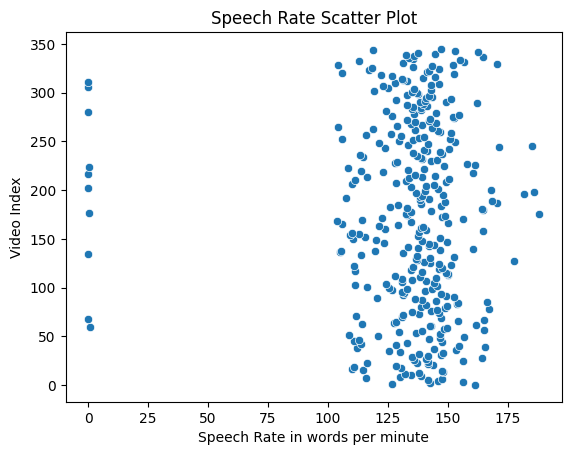

In [39]:
sns.scatterplot(x=audio_df['speech_rate'], y=audio_df.index)

plt.title("Speech Rate Scatter Plot")
plt.xlabel("Speech Rate in words per minute")
plt.ylabel("Video Index")

plt.show()

In [40]:
speech_rate_clean_mean = audio_df.loc[audio_df['speech_rate'] >= 75, 'speech_rate'].mean()
audio_df.loc[audio_df['speech_rate'] < 75, 'speech_rate'] = speech_rate_clean_mean
print(audio_df)

              id  speech_rate  pitch_range
0    RkewD966Y90   161.382114    3852.7495
1    gpIhGAUoeNY   126.857143    3854.4058
2    HOWJp8NV5xU   142.557629    3854.4329
3    VjWtMl6vQ3Q   156.252505    3854.4307
4    Idl2wlnpDHU   146.051282    3854.1404
..           ...          ...          ...
341  8ePqqZXSMQs   137.659766    3854.3940
342  z_CZ_VyMDXE   162.660312    3853.5400
343  ofM8LE9Zeaw   152.974138    3854.1904
344  MZJMi-6_4UU   118.796562    3854.4194
345  yXD5IlDstNk   146.946903    3853.8308

[346 rows x 3 columns]


In [60]:
audio_validate_df = pd.read_csv("../data/dataset/validation/validation_audio.csv")
audio_validate_df.loc[audio_validate_df['speech_rate'] < 75, 'speech_rate'] = speech_rate_clean_mean
print(audio_validate_df)

             id  speech_rate  pitch_range
0   vNoFdtcPFdk   155.940325    3854.4214
1   H0Zbg_CqMCs   140.814332    3854.4277
2   M0ewnewuciY   125.960265    3853.9517
3   D1WfID6kk90   137.288136    3854.3430
4   q1phVuNCuf0   135.983903    3854.4424
5   sooj-_bXWgk   135.120643    3854.4197
6   sQvrK8AGCAo   144.699454    3854.0810
7   S5C_z1nVaSg   147.300613    3853.6143
8   uB3v6n8t2dQ   141.811125    3854.1296
9   uIqJF1rgRJI   123.875715    3854.4310
10  bzCDvK3NNuk   132.130373    3854.3823
11  ebfOSDj4j3I   149.152738    3854.3755
12  ywAEVq9ULxs   131.871227    3854.3425
13  -fNoz5K5FHA   146.339286    3853.8923
14  TNR-d_4l09E   132.848485    3854.4065
15  0o98Jz4euW8   100.263981    3854.3809
16  s2K1JfNR7Sc   150.049751    3854.4400
17  qkdNITXomxs   116.107887    3854.4255
18  otr1YwNBWfc   147.478992    3854.4287
19  9fQkLQZe3u8   176.171654    3854.3389
20  gGEBUdM0PVc   140.973111    3854.0460
21  fkf4IBRSeEc   124.721550    3854.3752
22  SsCiQym5yQU   127.060533    38

In [61]:
audio_validate_df.to_csv("../data/dataset/train/validation_audio_clean.csv", header=True, index=False)

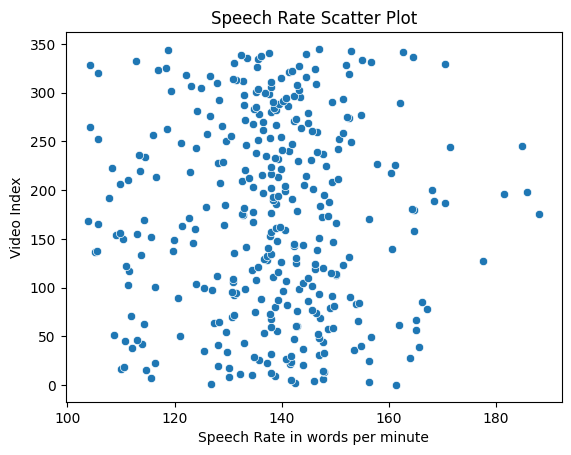

In [56]:
sns.scatterplot(x=audio_df['speech_rate'], y=audio_df.index)

plt.title("Speech Rate Scatter Plot")
plt.xlabel("Speech Rate in words per minute")
plt.ylabel("Video Index")

plt.show()

In [55]:
df['speech_rate'] = audio_df['speech_rate']
df['pitch_range'] = audio_df['pitch_range']

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


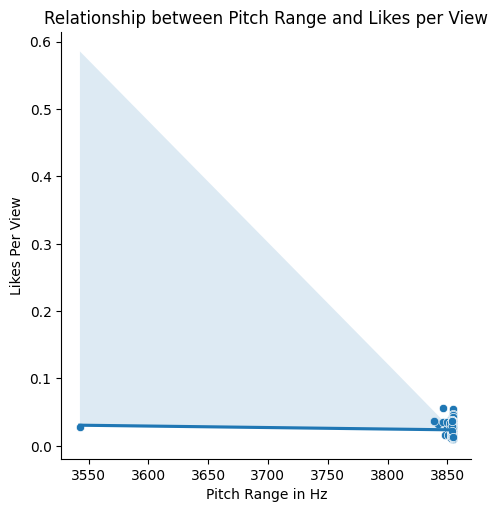

In [42]:
g = sns.relplot(x=df['pitch_range'], y=df['likes_per_view'], kind='scatter')
sns.regplot(x=df['pitch_range'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Pitch Range and Likes per View")
plt.xlabel("Pitch Range in Hz")
plt.ylabel("Likes Per View")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


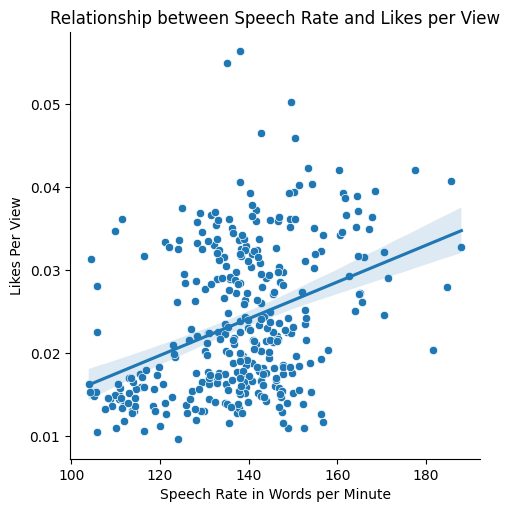

In [57]:
g = sns.relplot(x=df['speech_rate'], y=df['likes_per_view'], kind='scatter')
sns.regplot(x=df['speech_rate'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Speech Rate and Likes per View")
plt.xlabel("Speech Rate in Words per Minute")
plt.ylabel("Likes Per View")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


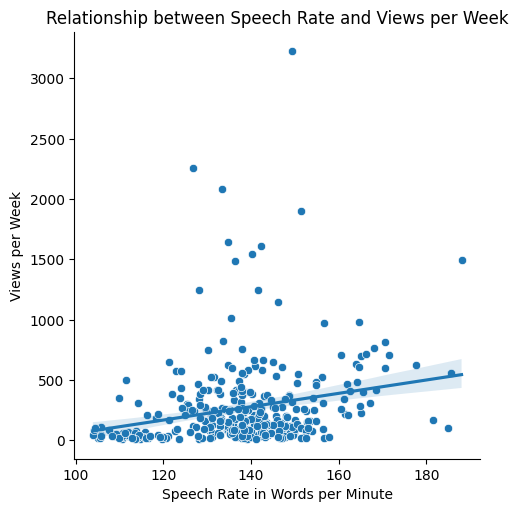

In [58]:
g = sns.relplot(x=df['speech_rate'], y=df['views_per_week'], kind='scatter')
sns.regplot(x=df['speech_rate'], y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Speech Rate and Views per Week")
plt.xlabel("Speech Rate in Words per Minute")
plt.ylabel("Views per Week")

plt.show()

In [45]:
audio2_df = pd.read_csv("../data/dataset/train/train_audio2.csv")

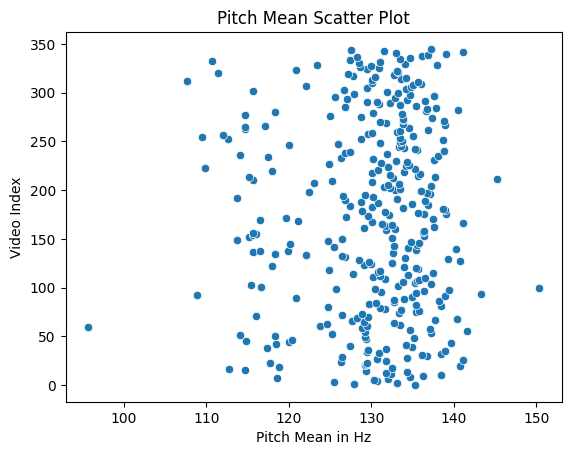

In [46]:
sns.scatterplot(x=audio2_df['pitch_mean'], y=audio2_df.index)

plt.title("Pitch Mean Scatter Plot")
plt.xlabel("Pitch Mean in Hz")
plt.ylabel("Video Index")

plt.show()

In [47]:
df['pitch_mean'] = audio2_df['pitch_mean']

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


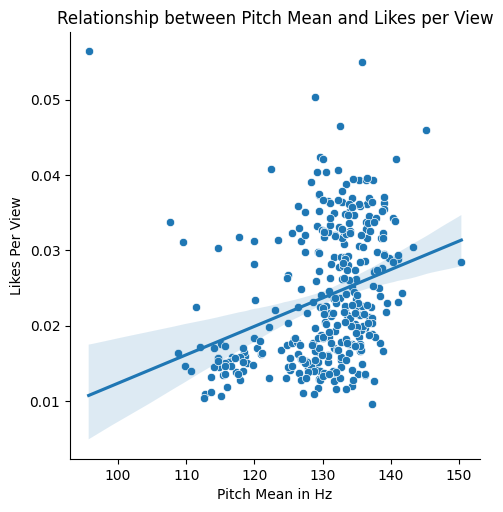

In [48]:
g = sns.relplot(x=df['pitch_mean'], y=df['likes_per_view'], kind='scatter')
sns.regplot(x=df['pitch_mean'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Pitch Mean and Likes per View")
plt.xlabel("Pitch Mean in Hz")
plt.ylabel("Likes Per View")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


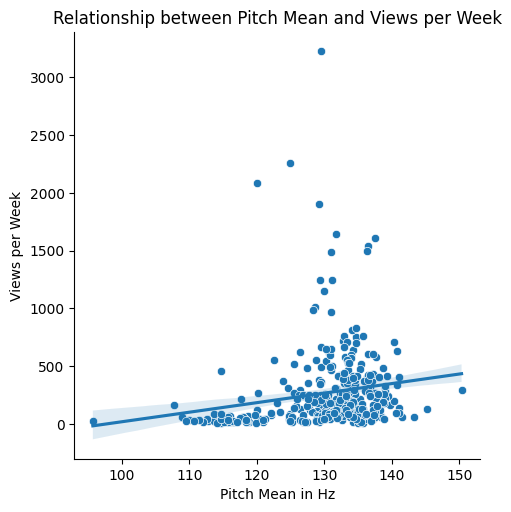

In [49]:
g = sns.relplot(x=df['pitch_mean'], y=df['views_per_week'], kind='scatter')
sns.regplot(x=df['pitch_mean'], y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Pitch Mean and Views per Week")
plt.xlabel("Pitch Mean in Hz")
plt.ylabel("Views per Week")

plt.show()

In [50]:
min_row_index = audio2_df['pitch_mean'].idxmin()
max_row_index = audio2_df['pitch_mean'].idxmax()
min_row = audio2_df.loc[min_row_index]
max_row = audio2_df.loc[max_row_index]
print(min_row)
print(max_row)

id            yon8iO0nW3I
pitch_mean      95.701467
Name: 59, dtype: object
id            WHhDgxkiR9c
pitch_mean     150.344232
Name: 100, dtype: object


## Visual Processing Analysis
### Colorfulness index was processed from the training data, and that is investigated here

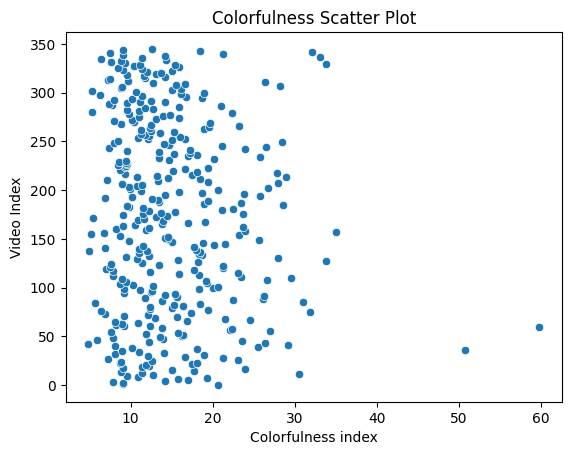

In [51]:
sns.scatterplot(x=visual_df['colorfulness'], y=visual_df.index)

plt.title("Colorfulness Scatter Plot")
plt.xlabel("Colorfulness index")
plt.ylabel("Video Index")

plt.show()

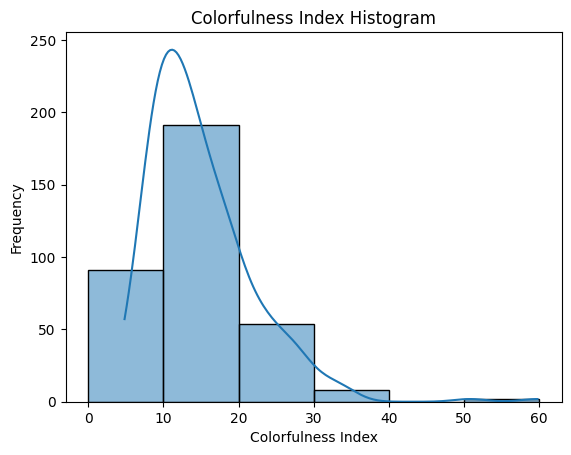

In [52]:
bin_edges = [0, 10, 20, 30, 40, 50, 60]

sns.histplot(data=visual_df['colorfulness'], bins=bin_edges, kde=True)

plt.title("Colorfulness Index Histogram")
plt.xlabel("Colorfulness Index")
plt.ylabel("Frequency")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


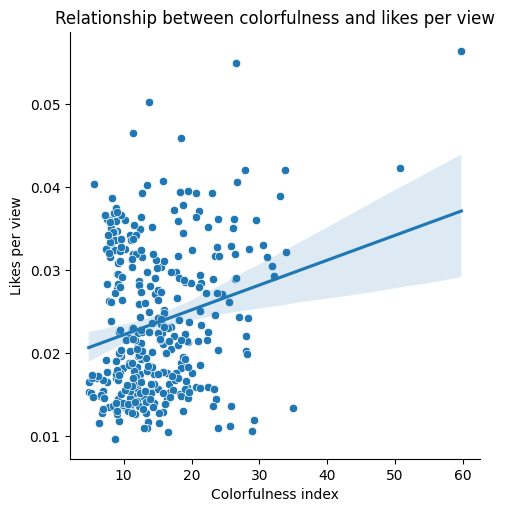

In [53]:
df['colorfulness'] = visual_df['colorfulness']
g = sns.relplot(x=df['colorfulness'], y=df['likes_per_view'], kind='scatter')
sns.regplot(x=df['colorfulness'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between colorfulness and likes per view")
plt.xlabel("Colorfulness index")
plt.ylabel("Likes per view")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


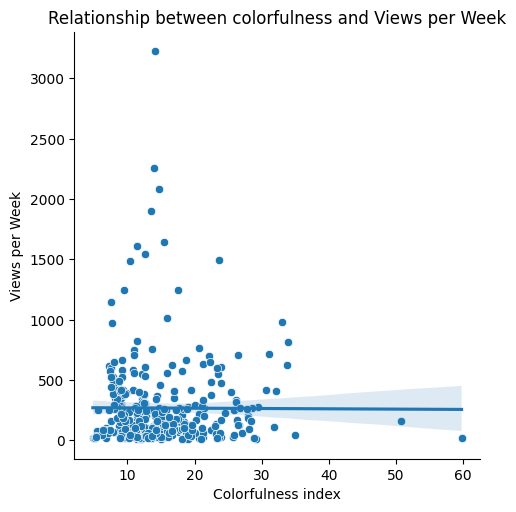

In [54]:
df['colorfulness'] = visual_df['colorfulness']
g = sns.relplot(x=df['colorfulness'], y=df['views_per_week'], kind='scatter')
sns.regplot(x=df['colorfulness'], y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between colorfulness and Views per Week")
plt.xlabel("Colorfulness index")
plt.ylabel("Views per Week")

plt.show()

# New features: Updated pitch mean and equation indicator count

In [5]:
updated_audio_df = pd.read_csv("../data/dataset/train/train_audio2_2.csv")

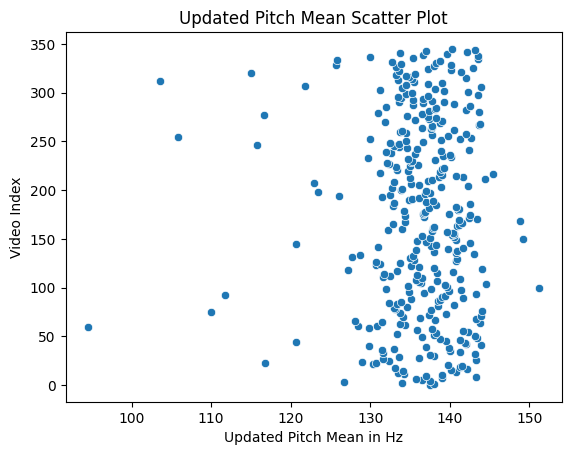

In [6]:
sns.scatterplot(x=updated_audio_df['pitch_mean'], y=updated_audio_df.index)

plt.title("Updated Pitch Mean Scatter Plot")
plt.xlabel("Updated Pitch Mean in Hz")
plt.ylabel("Video Index")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


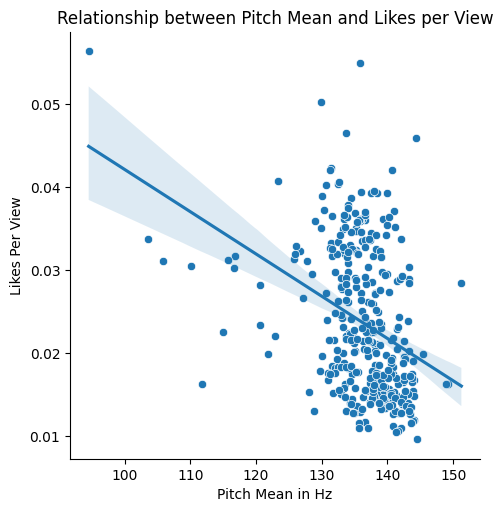

In [7]:
df['pitch_mean'] = updated_audio_df['pitch_mean']
g = sns.relplot(x=df['pitch_mean'], y=df['likes_per_view'], kind='scatter')
sns.regplot(x=df['pitch_mean'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Pitch Mean and Likes per View")
plt.xlabel("Pitch Mean in Hz")
plt.ylabel("Likes Per View")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


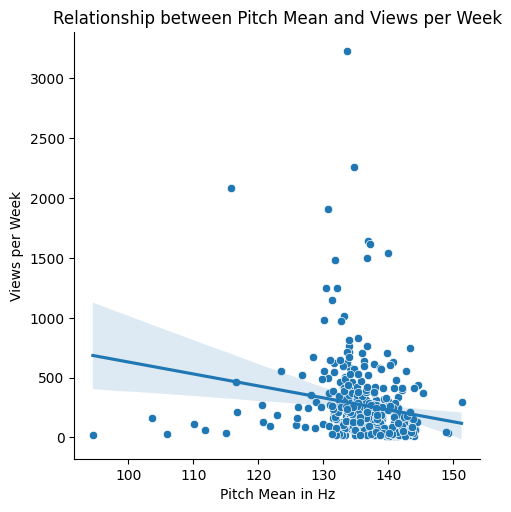

In [8]:
g = sns.relplot(x=df['pitch_mean'], y=df['views_per_week'], kind='scatter')
sns.regplot(x=df['pitch_mean'], y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Pitch Mean and Views per Week")
plt.xlabel("Pitch Mean in Hz")
plt.ylabel("Views per Week")

plt.show()

In [5]:
word_count_df = pd.read_csv("../data/dataset/train/train_word_count.csv")

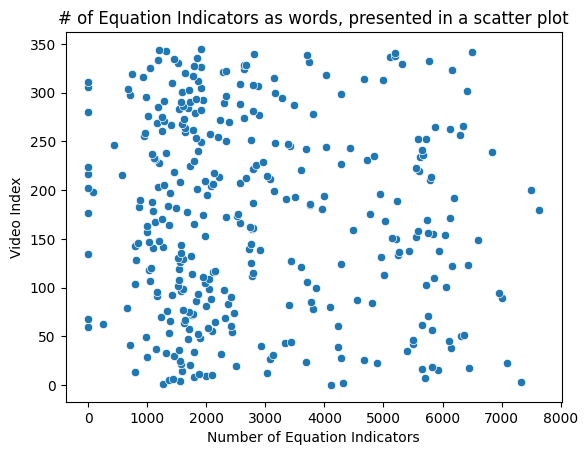

In [7]:
sns.scatterplot(x=word_count_df['equation_indicators'], y=word_count_df.index)

plt.title("# of Equation Indicators as words, presented in a scatter plot")
plt.xlabel("Number of Equation Indicators")
plt.ylabel("Video Index")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


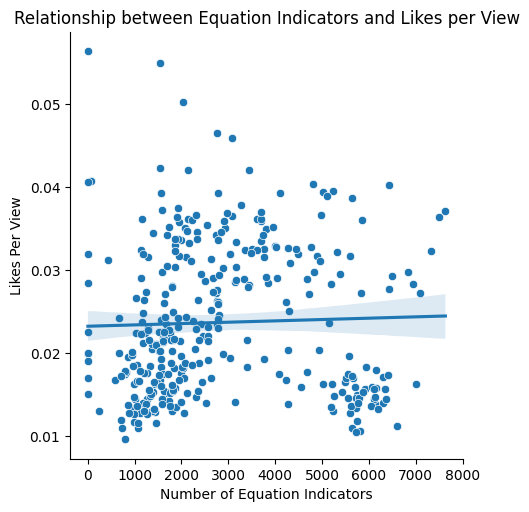

In [8]:
df['equation_indicators'] = word_count_df['equation_indicators']
g = sns.relplot(x=df['equation_indicators'], y=df['likes_per_view'], kind='scatter')
sns.regplot(x=df['equation_indicators'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Equation Indicators and Likes per View")
plt.xlabel("Number of Equation Indicators")
plt.ylabel("Likes Per View")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


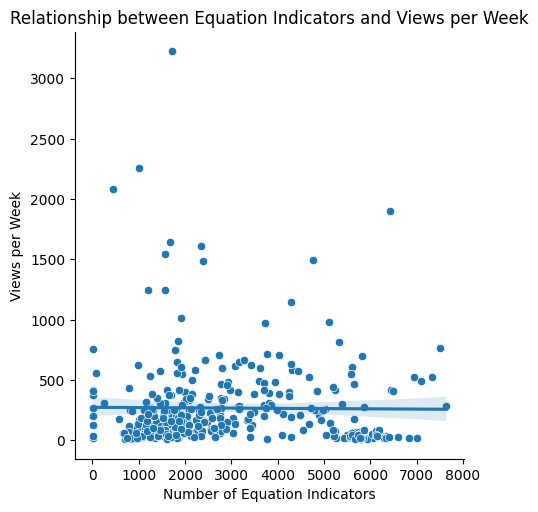

In [9]:
g = sns.relplot(x=df['equation_indicators'], y=df['views_per_week'], kind='scatter')
sns.regplot(x=df['equation_indicators'], y=df['views_per_week'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between Equation Indicators and Views per Week")
plt.xlabel("Number of Equation Indicators")
plt.ylabel("Views per Week")

plt.show()

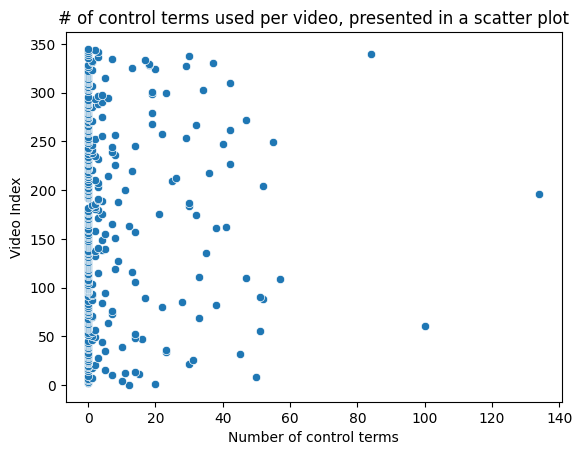

In [4]:
controlCountDf = pd.read_csv("../data/dataset/train/train_control_count.csv")
sns.scatterplot(x=controlCountDf['controlCount'], y=controlCountDf.index)

plt.title("# of control terms used per video, presented in a scatter plot")
plt.xlabel("Number of control terms")
plt.ylabel("Video Index")

plt.show()

In [7]:
controlCountDfsorted = controlCountDf.sort_values(by='controlCount', ascending=False)
top_3_ids = controlCountDfsorted.head(3)
print(top_3_ids)

              id                                         transcript  \
196  BkpORajO3Ak  I[Music]welcome back everyone I'm Steve Brento...   
60   oulLR06lj_E  hi everyone I'm Steve Brenton and thisis the f...   
340  BTLZu-1IMcE  I[Music]hi everyone I'm Steve Brenton and I've...   

     controlCount  
196           134  
60            100  
340            84  


In [8]:
controlCountDfClean = controlCountDf.drop(top_3_ids.index)

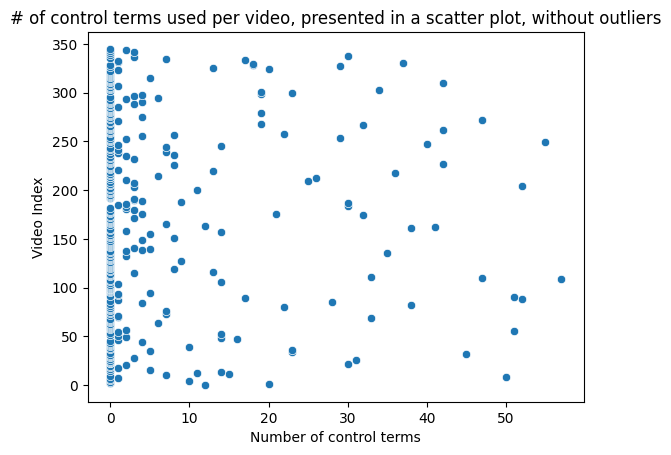

In [9]:
sns.scatterplot(x=controlCountDfClean['controlCount'], y=controlCountDfClean.index)

plt.title("# of control terms used per video, presented in a scatter plot, without outliers")
plt.xlabel("Number of control terms")
plt.ylabel("Video Index")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


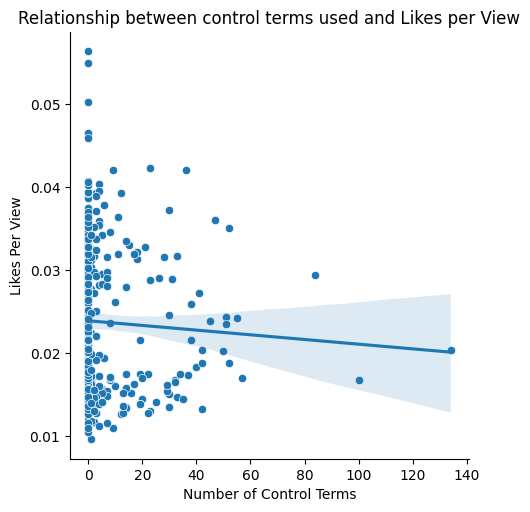

In [10]:
df['controlCount'] = controlCountDf['controlCount']
g = sns.relplot(x=df['controlCount'], y=df['likes_per_view'], kind='scatter')
sns.regplot(x=df['controlCount'], y=df['likes_per_view'], data=df, ax=g.ax, scatter=False)

plt.title("Relationship between control terms used and Likes per View")
plt.xlabel("Number of Control Terms")
plt.ylabel("Likes Per View")

plt.show()

In [11]:
dfClean = df.drop(top_3_ids.index)

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


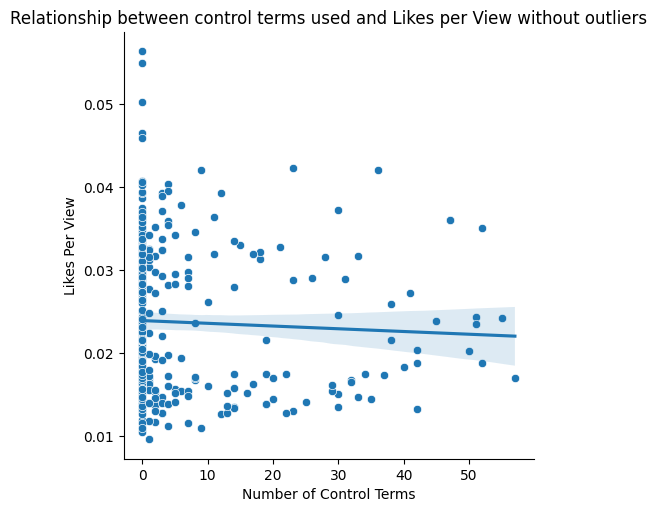

In [12]:
g = sns.relplot(x=dfClean['controlCount'], y=dfClean['likes_per_view'], kind='scatter')
sns.regplot(x=dfClean['controlCount'], y=dfClean['likes_per_view'], data=dfClean, ax=g.ax, scatter=False)

plt.title("Relationship between control terms used and Likes per View without outliers")
plt.xlabel("Number of Control Terms")
plt.ylabel("Likes Per View")

plt.show()

c:\engineering\skripsie\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


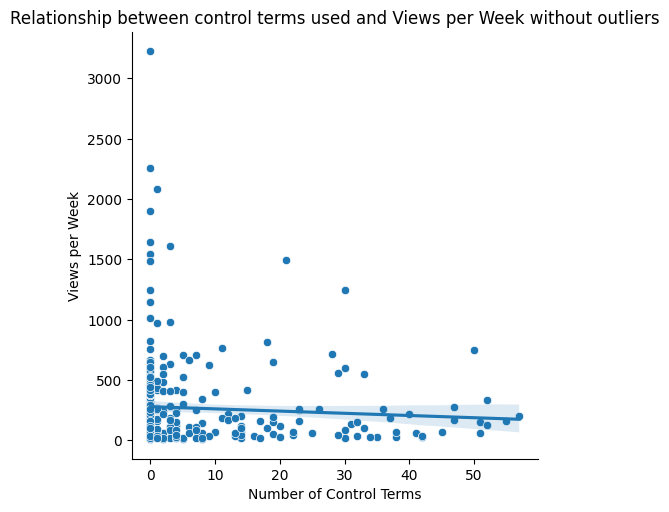

In [14]:
g = sns.relplot(x=dfClean['controlCount'], y=dfClean['views_per_week'], kind='scatter')
sns.regplot(x=dfClean['controlCount'], y=dfClean['views_per_week'], data=dfClean, ax=g.ax, scatter=False)

plt.title("Relationship between control terms used and Views per Week without outliers")
plt.xlabel("Number of Control Terms")
plt.ylabel("Views per Week")

plt.show()